# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:  
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Objectives

- Model the price of houses with the available independent variables for management to understand the **pricing dynamics** of a new market. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 

The Analysis is divided into 7 main parts :

1. Data Understanding
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preparation + Feature Engineering
5. Model Building
6. Final Model Selection + Evaluation
7. Conclusion

## Data Understanding

#### Loading Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.style as style


from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import ElasticNetCV, ElasticNet, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew
import missingno as msno

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
data = pd.read_csv("train.csv", encoding = 'utf-8')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check for column details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# To get the description of the dataset
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.shape

(1460, 81)

## Data Cleaning

### Check for Null Values

In [6]:
print("Number of columns having all rows Null : ",len(data.columns[data.isna().all()].tolist()))

Number of columns having all rows Null :  0


In [7]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

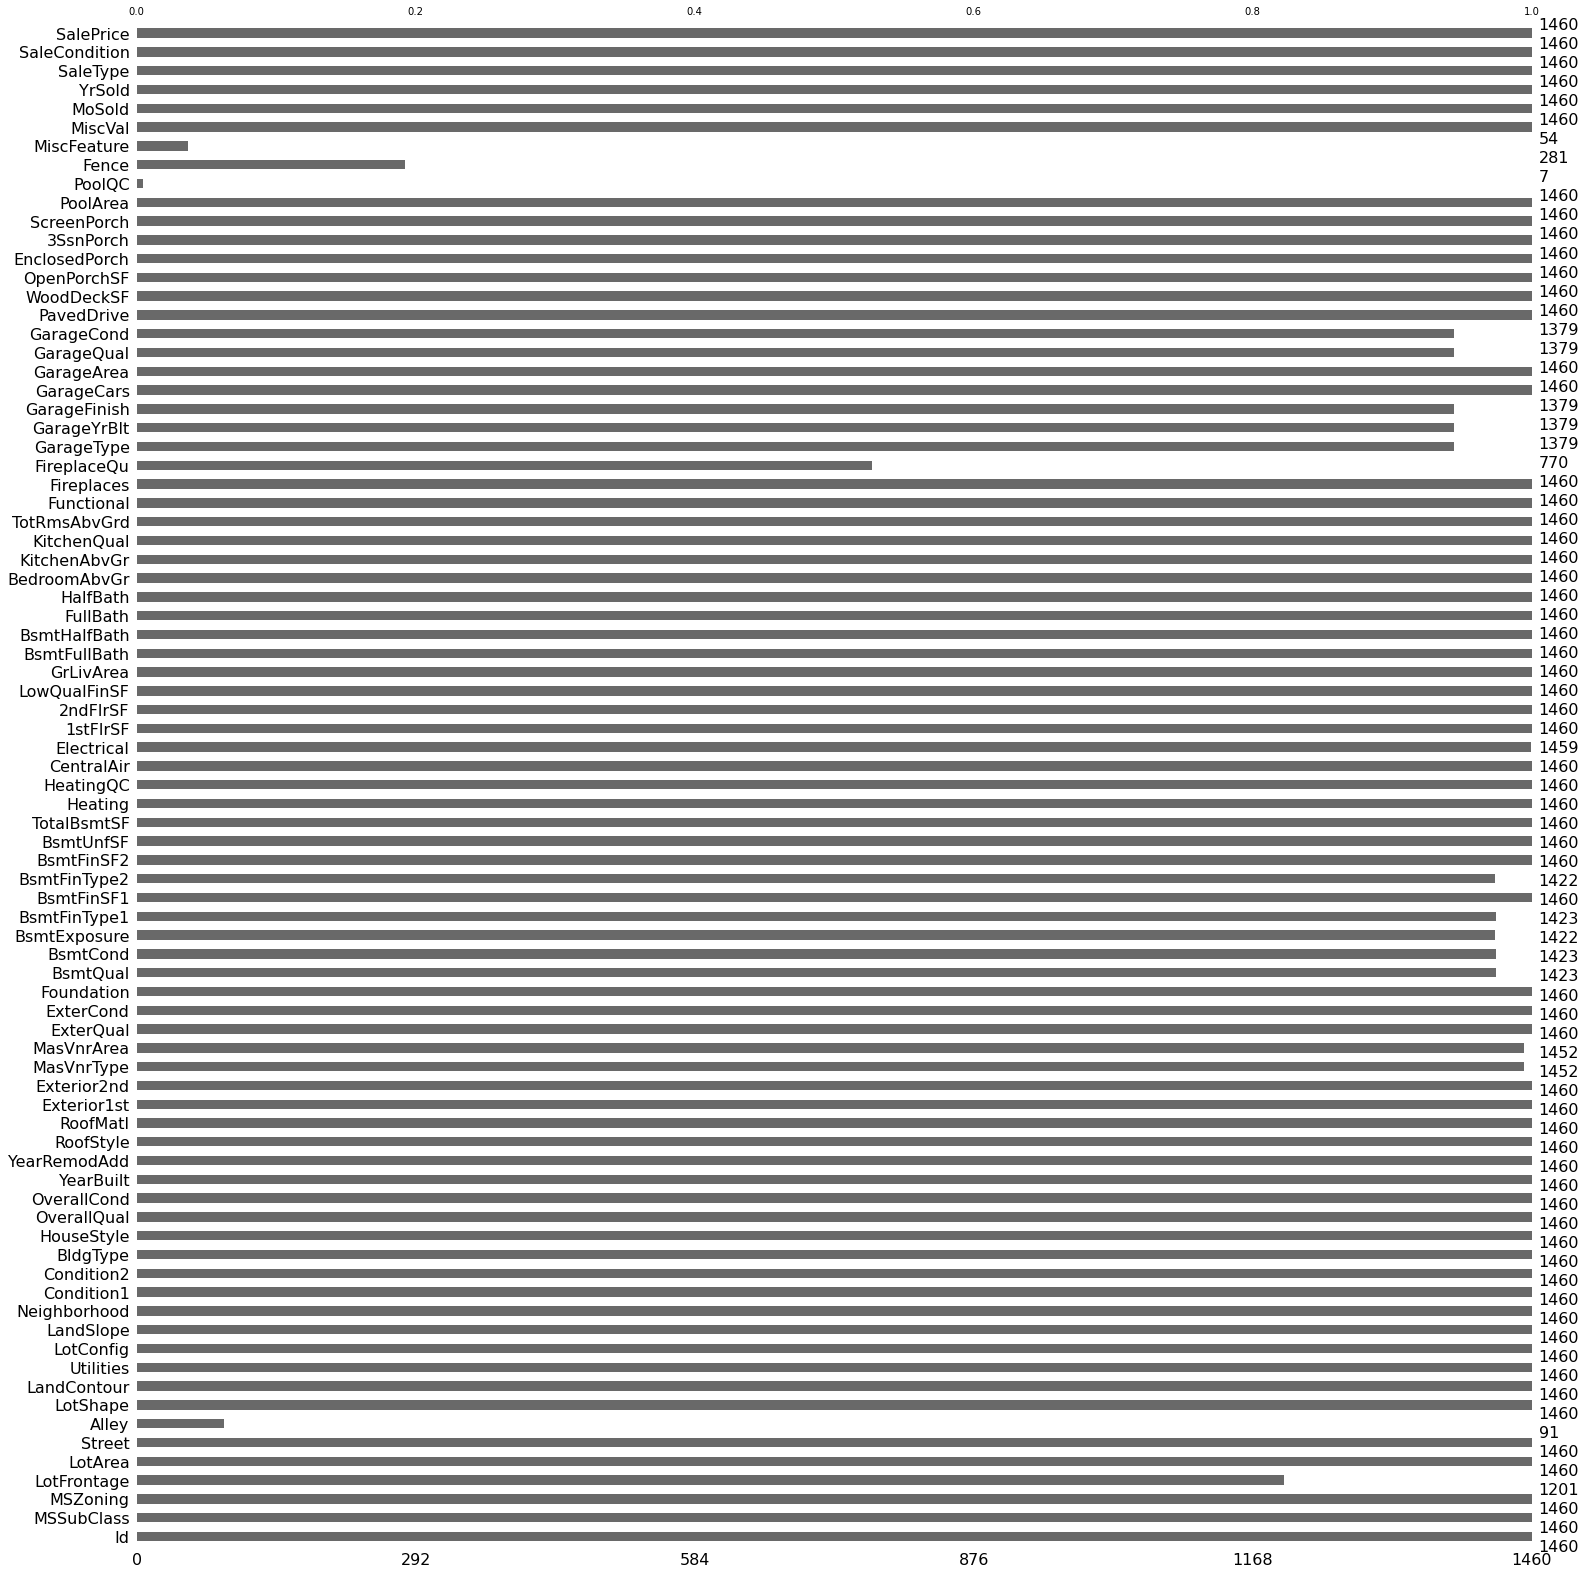

In [8]:
# Understanding the percentage of missing values
msno.bar(data)

In [9]:
nullseries = data.isnull().sum()
null_percentage = nullseries[nullseries > 0]/data.shape[0]*100
print(null_percentage)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


Removing columns with more than **15%** data missing as imputation might exaggerate data in this case

In [10]:
null_percentage[null_percentage > 15]

LotFrontage    17.739726
Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [11]:
data = data.drop(null_percentage[null_percentage > 15].index,1)

In [12]:
nullseries = data.isnull().sum()
null_percentage = nullseries[nullseries > 0]/data.shape[0]*100
print(null_percentage)

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


- After looking at data distribution for all columns with missing values we realized even after removing missing value rows we would have enough data to move forward with our analysis
- So it is always better not to exaggerate the data as data quality might remain same when the company will use the model in real time

In [13]:
data = data.dropna()

In [14]:
data.shape

(1338, 75)

In [15]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [16]:
data.head(3)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


### checking duplicates

In [17]:
#checking duplicates
data[data.duplicated()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [18]:
# Removing Id feature as it is not useful for EDA & Modelling
data = data.drop("Id", axis=1)

## Exploratory Data Analysis

### Univariate Analysis

To understand the final variables of analysis in depth individually

To use these insights to have intutions about interesting combinations which can be explored during Bivariate analysis

#### Neighborhood

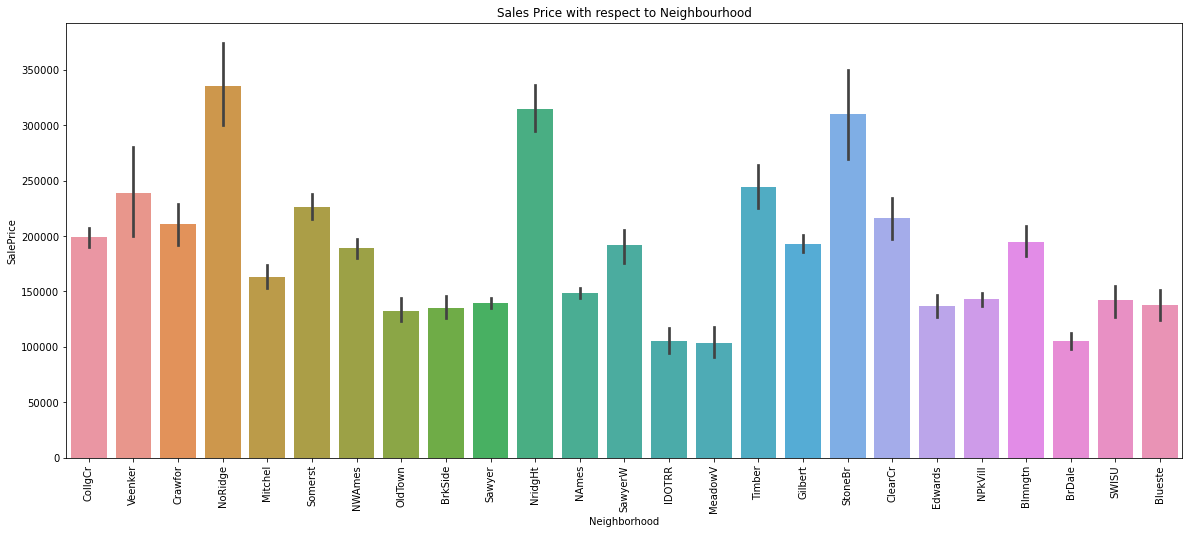

In [19]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

Properties in some of the Neighborhoods are high priced.

#### OverallCond

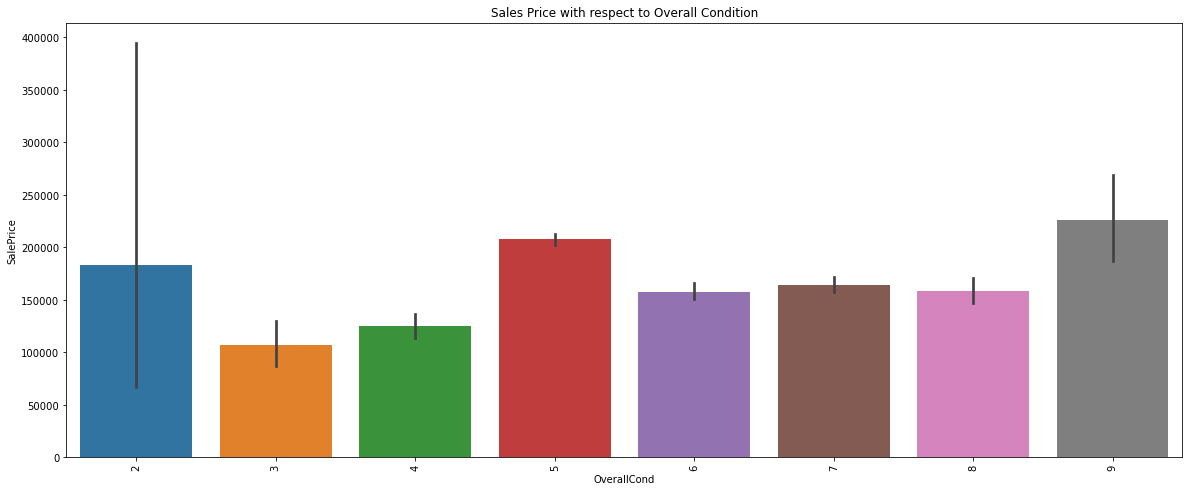

In [20]:
# plot 'overall condition' with respect to 'Saleprice'
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)
plt.show()

#### OverallQual

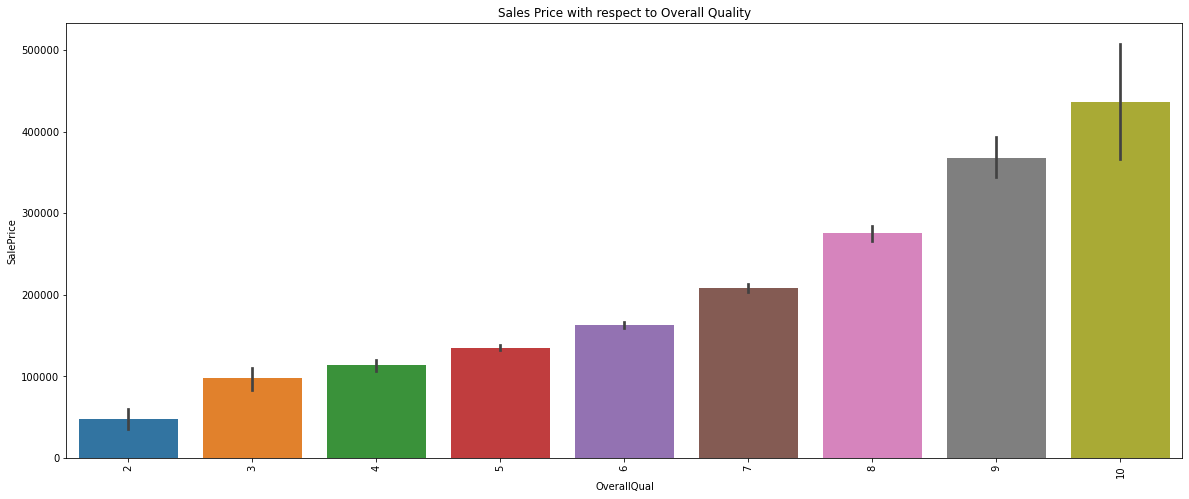

In [21]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)
plt.show()

#### GrLivArea

In [22]:
data['GrLivArea'].describe()

count    1338.000000
mean     1537.585202
std       520.579960
min       438.000000
25%      1160.000000
50%      1480.000000
75%      1791.500000
max      5642.000000
Name: GrLivArea, dtype: float64

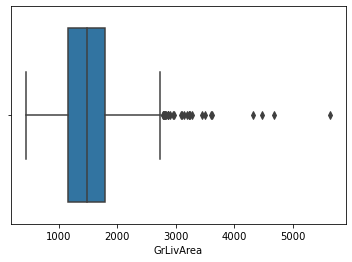

In [23]:
sns.boxplot(data['GrLivArea'])
plt.show()

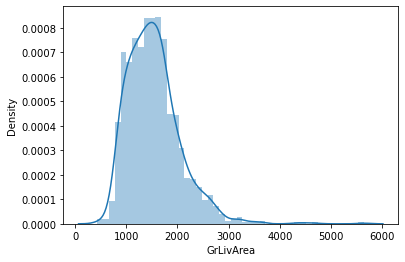

In [24]:
sns.distplot(data['GrLivArea'])
plt.show()

#### BsmtHalfBath

In [25]:
data['BsmtHalfBath'].value_counts(normalize=True) * 100

0    94.020927
1     5.904335
2     0.074738
Name: BsmtHalfBath, dtype: float64

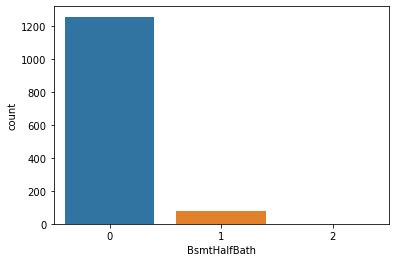

In [26]:
g = sns.countplot(data=data,x='BsmtHalfBath',orient='h')
plt.show()

#### OverallCond

In [27]:
data['OverallCond'].value_counts(normalize=True) * 100

5    57.548580
6    17.414051
7    13.677130
8     5.082212
4     3.437967
9     1.494768
3     1.121076
2     0.224215
Name: OverallCond, dtype: float64

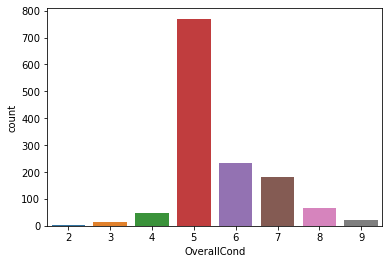

In [28]:
g = sns.countplot(data=data,x='OverallCond')
plt.show()

#### ExterCond

In [29]:
data['ExterCond'].value_counts(normalize=True) * 100

TA    88.415546
Gd    10.239163
Fa     1.195815
Ex     0.149477
Name: ExterCond, dtype: float64

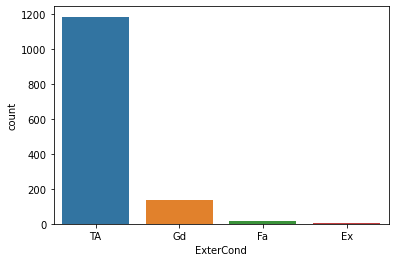

In [30]:
g = sns.countplot(data=data,x='ExterCond')
plt.show()

#### SalePrice

In [31]:
data['SalePrice'].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

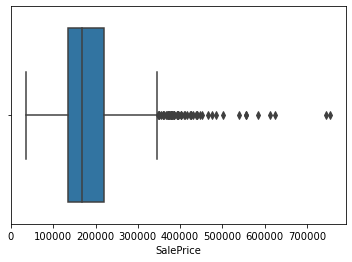

In [32]:
sns.boxplot(data['SalePrice'])
plt.show()

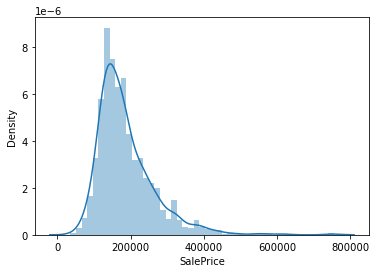

In [33]:
sns.distplot(data['SalePrice'])
plt.show()

#### Street, Utilities, LotShape, LandContour

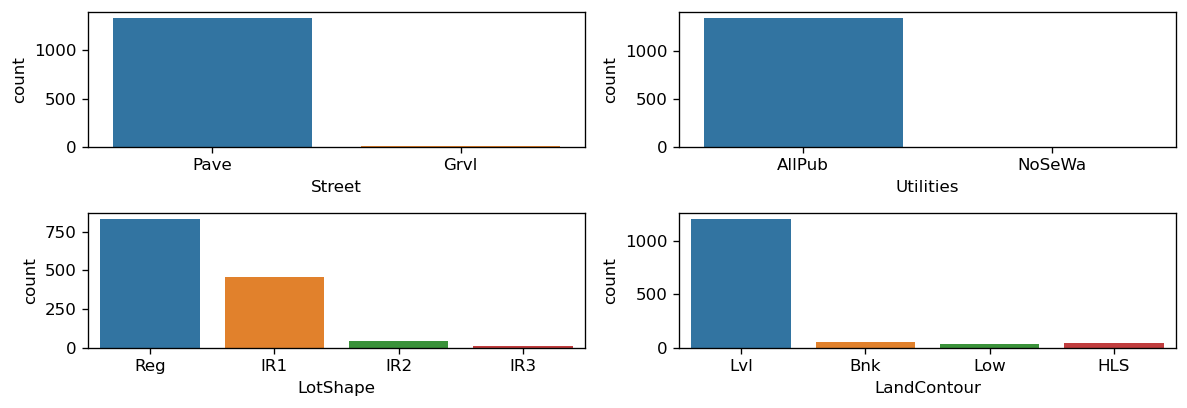

In [34]:
plt.figure(figsize=[10.0,3.5],dpi=120,edgecolor='c',frameon=True)
plt.subplot(2,2,1)
g = sns.countplot(data=data,x='Street',orient='h')
plt.subplot(2,2,2)
g = sns.countplot(data=data,x='Utilities',orient='h')
plt.subplot(2,2,3)
g = sns.countplot(data=data,x='LotShape',orient='h')
plt.subplot(2,2,4)
g = sns.countplot(data=data,x='LandContour',orient='h')
plt.tight_layout()
plt.show()

### Bivariate Analysis

To understand the final variables of analysis for providing recommendations to business

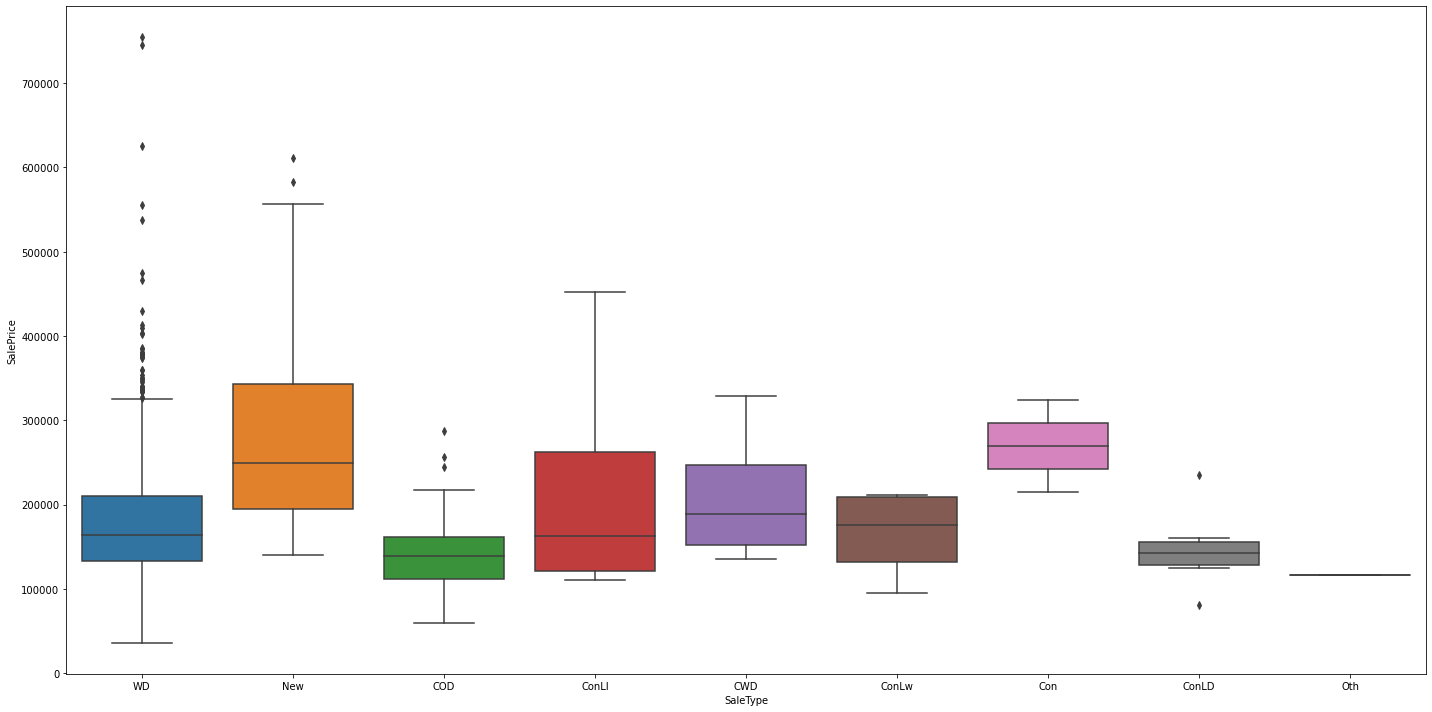

In [35]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = data)
plt.tight_layout()
plt.show()

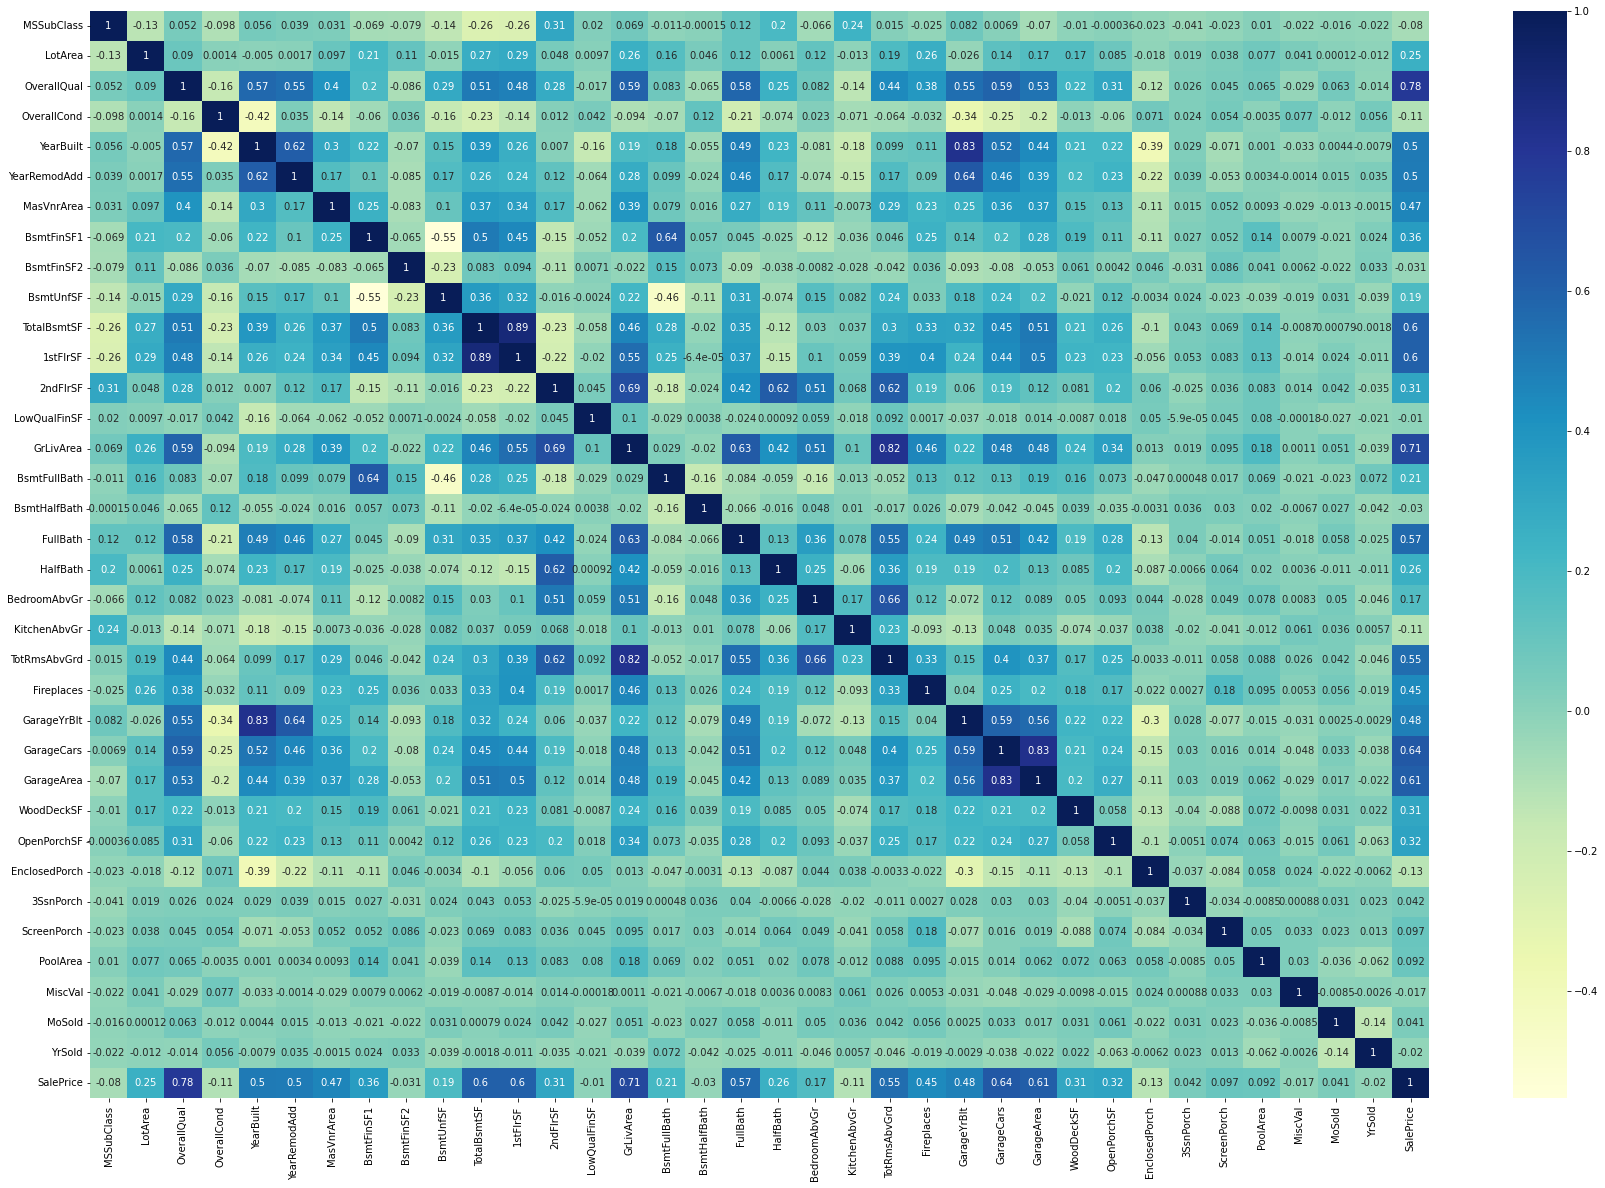

In [36]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

We can see that some of the variables are correlated

Before dropping these columns, we will first check their predictive power

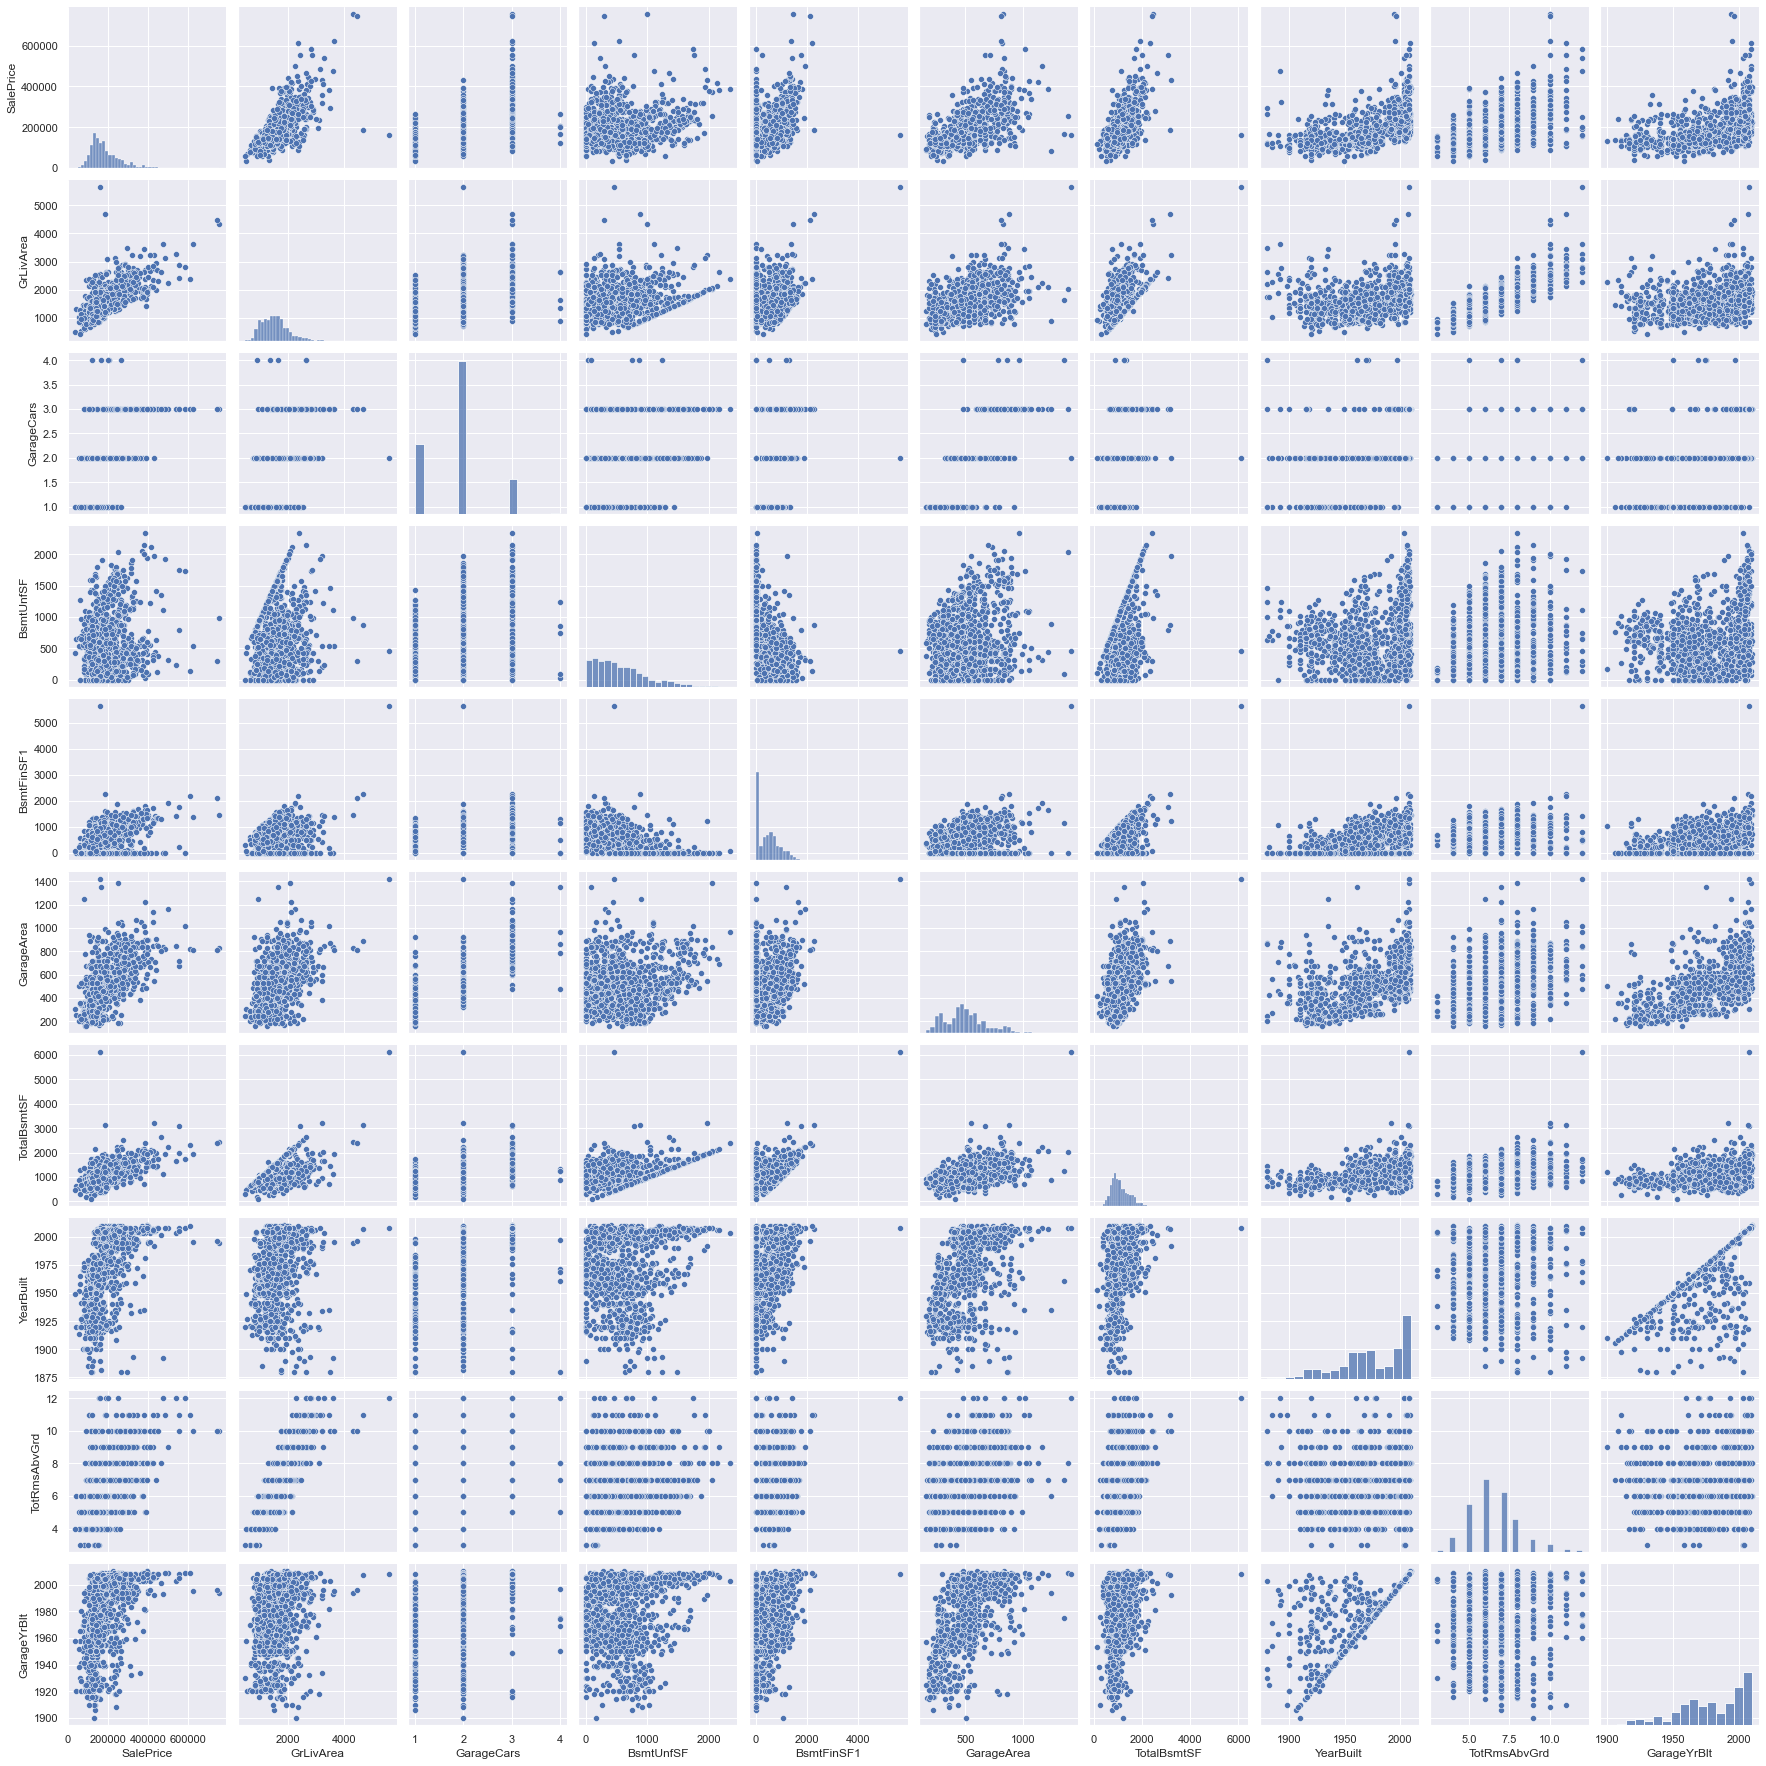

In [37]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 
        'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 
        'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

## Data Preparation + Feature Engineering

Feature Engineering

In [38]:
# Derived features using the time based raw attributes available

data["Remodel_Flag"] = (data["YearRemodAdd"] != data["YearBuilt"]) * 1
data["RecentRemodel_Flag"] = (data["YearRemodAdd"] == data["YrSold"]) * 1

data["Age"] = data['YearBuilt'].max() - data["YearBuilt"]

data["TimeSinceSold"] = data["YrSold"].max() - data["YrSold"]
data["TimeSinceGarageBlt"] = data["GarageYrBlt"].max() - data["GarageYrBlt"] 

In [39]:
# Dropping year columns as we have extracted derived features
data = data.drop(['YearBuilt','YearRemodAdd',
                  'GarageYrBlt','YrSold'],axis='columns')

In [40]:
#New neighborhood category feature by using insights from the data dictionary 
# data["Good_Neighborhood"] = 0

# for i in ['NridgHt', 'Crawfor', 'StoneBr', 'Somerst', 'NoRidge']:
#     data['Good_Neighborhood'] = np.where(data['Neighborhood'] == i,1,0)
    
    
data["Good_Neighborhood"] = 0
data['Good_Neighborhood'] = np.where(data['Neighborhood'] == 'NridgHt',1,0)
data['Good_Neighborhood'] = np.where(data['Neighborhood'] == 'Crawfor',1,0)
data['Good_Neighborhood'] = np.where(data['Neighborhood'] == 'StoneBr',1,0)
data['Good_Neighborhood'] = np.where(data['Neighborhood'] == 'Somerst',1,0)
data['Good_Neighborhood'] = np.where(data['Neighborhood'] == 'NoRidge',1,0)

In [41]:
# Custom Bathroom and Surface Area feature
data['Total_Bath'] = data['FullBath'] + data['BsmtFullBath'] + 0.5 * (data['BsmtHalfBath'] + data['HalfBath'])
data['Total_SF'] = data['TotalBsmtSF'] + data['GrLivArea']

In [42]:
# Group existing features - squash into smaller groups
data['OverallQual_simple'] = data['OverallQual'].replace({1:1, 2:1, 3:1, # bad quality
                                                        4:2, 5:2, 6:2, # mediocre quality
                                                        7:3, 8:3, 9:3, 10:3 # good quality
                                                       })
data['OverallCond_simple'] = data['OverallCond'].replace({1:1, 2:1, 3:1, # bad quality
                                                        4:2, 5:2, 6:2, # mediocre quality
                                                        7:3, 8:3, 9:3, 10:3 # good quality
                                                       })

In [43]:
data.head(3)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Remodel_Flag,RecentRemodel_Flag,Age,TimeSinceSold,TimeSinceGarageBlt,Good_Neighborhood,Total_Bath,Total_SF,OverallQual_simple,OverallCond_simple
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,0,0,7,2,7.0,0,3.5,2566,3,2
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,0,0,34,3,34.0,0,2.5,2524,2,3
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,1,0,9,2,9.0,0,3.5,2706,3,2


In [44]:
# categorical features 
cat_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition',
           'Good_Neighborhood','Remodel_Flag','RecentRemodel_Flag']

In [45]:
# numerical features 
num_col = list(set(data.columns.tolist()) - set(cat_col))
print(num_col)

['LowQualFinSF', 'Age', 'ScreenPorch', 'EnclosedPorch', 'GarageCars', 'BsmtHalfBath', 'LotArea', 'MiscVal', 'PoolArea', 'BsmtFinSF2', 'OverallQual_simple', '3SsnPorch', 'BsmtUnfSF', 'SalePrice', 'OverallCond_simple', 'HalfBath', 'FullBath', '1stFlrSF', 'WoodDeckSF', 'TimeSinceGarageBlt', 'BedroomAbvGr', 'MasVnrArea', 'TotalBsmtSF', 'KitchenAbvGr', 'TimeSinceSold', 'GarageArea', 'TotRmsAbvGrd', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', 'Fireplaces', 'OpenPorchSF', 'BsmtFullBath', 'Total_SF', 'Total_Bath']


In [46]:
data.shape

(1338, 80)

### Understanding the distribution of Target Feature

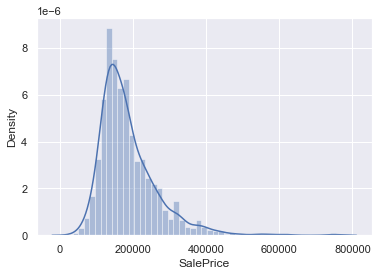

In [47]:
sns.distplot((data["SalePrice"]))
plt.show()

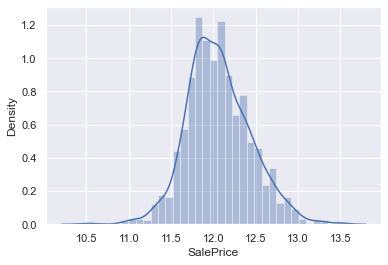

In [48]:
sns.distplot(np.log1p(data["SalePrice"]))
plt.show()

### Checking the skewed features

In [49]:
skewness = data[num_col].apply(skew)
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index

In [50]:
skewed_features

Index(['LowQualFinSF', 'ScreenPorch', 'EnclosedPorch', 'BsmtHalfBath',
       'LotArea', 'MiscVal', 'PoolArea', 'BsmtFinSF2', '3SsnPorch',
       'BsmtUnfSF', 'SalePrice', 'OverallCond_simple', '1stFlrSF',
       'WoodDeckSF', 'MasVnrArea', 'TotalBsmtSF', 'KitchenAbvGr', 'GarageArea',
       'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', 'OpenPorchSF', 'Total_SF'],
      dtype='object')

Log Transformation for skewed features will help in reducing the impact of outliers
Formula : log(feature + 1)

In [51]:
data[skewed_features] = data[skewed_features].applymap(np.log1p)

### Encoding the categorical features

In [52]:
data = pd.get_dummies(data, columns=cat_col,drop_first=True)

In [53]:
data.head(3)

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,TimeSinceSold,TimeSinceGarageBlt,Total_Bath,Total_SF,OverallQual_simple,OverallCond_simple,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Good_Neighborhood_1,Remodel_Flag_1,RecentRemodel_Flag_1
0,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,2,6.308098,0.000000,4.127134,0.0,0.0,0.0,0.0,0.0,12.247699,7,2,7.0,3.5,7.850493,3,1.098612,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,2,6.133398,5.700444,0.000000,0.0,0.0,0.0,0.0,0.0,12.109016,34,3,34.0,2.5,7.833996,2,1.386294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,2,6.411818,0.000000,3.761200,0.0,0.0,0.0,0.0,0.0,12.317171,9,2,9.0,3.5,7.903596,3,1.098612,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [54]:
data.shape

(1338, 269)

### MinMax Scaling to handle outliers

In [55]:
scaler = StandardScaler()
data[num_col] = scaler.fit_transform(data[num_col])

In [56]:
data.head(3)

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,TimeSinceSold,TimeSinceGarageBlt,Total_Bath,Total_SF,OverallQual_simple,OverallCond_simple,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Good_Neighborhood_1,Remodel_Flag_1,RecentRemodel_Flag_1
0,-0.164847,1.137663,0.737065,-0.366851,-0.488547,-0.524341,-0.855511,1.156562,-0.115907,0.492279,1.088949,-0.251620,0.77556,1.184848,0.174239,-0.172199,0.915080,-1.005546,0.202747,0.416864,-0.987444,0.811074,-0.394758,-0.131443,-0.307028,-0.072503,-0.189103,0.488980,-1.014157,-0.146084,-0.985427,1.635115,0.050234,1.203422,-0.415128,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.082256,-0.852097,0.848144,-0.366851,-0.094519,0.573193,0.383015,-0.885924,-0.115907,-0.449813,-0.851149,3.926178,0.77556,-0.799291,0.174239,-0.172199,-0.347165,0.544478,0.202747,-0.043718,1.201341,-1.118947,-0.394758,-0.131443,-0.307028,-0.072503,-0.189103,0.120833,-0.100528,0.605686,0.104844,0.331311,-0.008699,-0.782002,1.846163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.389414,1.066311,0.609856,-0.366851,0.167784,-0.320511,-0.625496,1.160778,-0.115907,0.627144,1.088949,-0.251620,0.77556,1.184848,0.174239,-0.172199,-0.347165,0.544478,0.202747,0.690312,-0.987444,0.639948,-0.394758,-0.131443,-0.307028,-0.072503,-0.189103,0.673400,-0.946480,-0.146084,-0.904666,1.635115,0.239937,1.203422,-0.415128,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


## Model Building

Train Test Split [70:30]

In [57]:
X = data.drop(['SalePrice'],1)
y = data['SalePrice']

In [58]:
X.shape, y.shape

((1338, 268), (1338,))

In [98]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, 
                                                    random_state=1998)

### Running RFE for Feature Selection

In [99]:
# lm = LinearRegression()
# lm.fit(X_train, y_train)

In [100]:
from sklearn.ensemble import RandomForestRegressor
#  running RFE for top 100 variables
lm = RandomForestRegressor(n_estimators=100,n_jobs=-1)
lm.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [101]:
rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [102]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 16),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 94),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 56),
 ('FullBath', False, 12),
 ('HalfBath', False, 26),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 2),
 ('3SsnPorch', False, 108),
 ('ScreenPorch', False, 11),
 ('PoolArea', False, 114),
 ('MiscVal', False, 52),
 ('Age', True, 1),
 ('TimeSinceSold', True, 1),
 ('TimeSinceGarageBlt', True, 1),
 ('Total_Bath', True, 1),
 ('Total_SF', True, 1),
 ('OverallQual_simple', True, 1),
 ('OverallCond_simple', True, 1),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 174),
 ('MSSubClass_45'

In [103]:
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Age', 'TimeSinceSold',
       'TimeSinceGarageBlt', 'Total_Bath', 'Total_SF', 'OverallQual_simple',
       'OverallCond_simple', 'MSSubClass_30', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_Reg', 'LandContour_Lvl', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_OldTown', 'Condition1_Norm',
       'OverallQual_6', 'OverallQual_7', 'OverallCond_4', 'OverallCond_5',
       'ExterQual_TA', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'HeatingQC_TA', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Typ', 'GarageType_Detchd',
       'GarageFinish_Unf', 'SaleType_WD'],
      dtype='object')

In [104]:
X_train = X_train[cols]

## Ridge Regression

In [105]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [106]:
ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [107]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006626,0.001405,0.003726,0.001083,0.0001,{'alpha': 0.0001},0.909010,0.899964,0.829215,0.921191,0.927684,0.926736,0.871359,0.919633,0.870692,0.683714,0.875920,0.070759,23,0.895725,0.897132,0.904475,0.893785,0.892759,0.89375,0.899392,0.895617,0.899500,0.913998,0.898613,0.006109
1,0.008000,0.002000,0.003758,0.000945,0.001,{'alpha': 0.001},0.909010,0.899964,0.829216,0.921192,0.927684,0.926736,0.871360,0.919632,0.870692,0.683726,0.875921,0.070755,22,0.895725,0.897132,0.904475,0.893785,0.892759,0.89375,0.899392,0.895617,0.899500,0.913998,0.898613,0.006109
2,0.006354,0.001221,0.004100,0.000707,0.01,{'alpha': 0.01},0.909010,0.899966,0.829217,0.921203,0.927683,0.926734,0.871371,0.919622,0.870694,0.683847,0.875935,0.070722,21,0.895725,0.897132,0.904475,0.893785,0.892759,0.89375,0.899392,0.895617,0.899500,0.913998,0.898613,0.006109
3,0.005097,0.001295,0.002996,0.000627,0.05,{'alpha': 0.05},0.909009,0.899973,0.829221,0.921249,0.927681,0.926726,0.871419,0.919579,0.870702,0.684353,0.875991,0.070584,20,0.895725,0.897132,0.904475,0.893784,0.892758,0.89375,0.899392,0.895617,0.899499,0.913996,0.898613,0.006109
4,0.004443,0.000790,0.002738,0.000721,0.1,{'alpha': 0.1},0.909009,0.899981,0.829228,0.921303,0.927677,0.926716,0.871480,0.919527,0.870713,0.684918,0.876055,0.070429,19,0.895725,0.897131,0.904475,0.893783,0.892758,0.89375,0.899391,0.895617,0.899499,0.913991,0.898612,0.006107


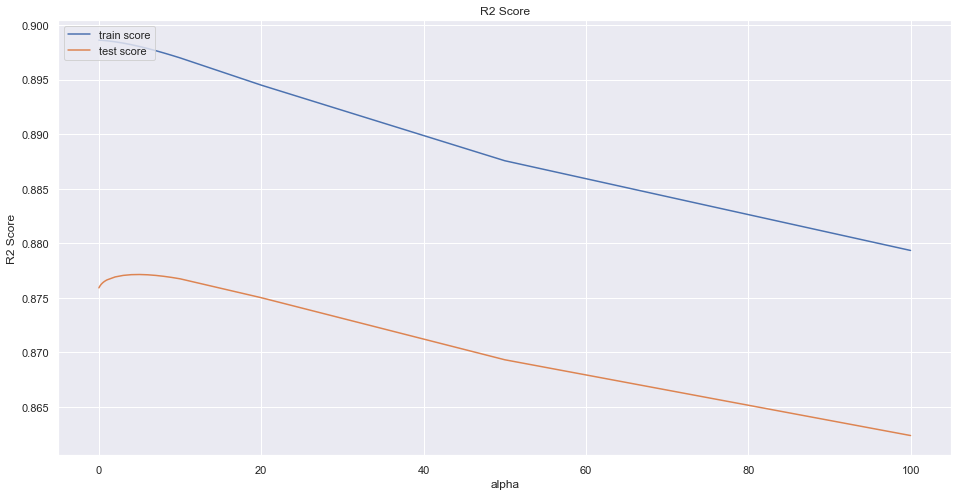

In [108]:
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [109]:
# Checking the best parameters
model_cv.best_params_

{'alpha': 5.0}

In [110]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.10155851, -0.00902226,  0.07309285, -0.02001255,  0.00769998,
       -0.05237806, -0.05711009,  0.20841419, -0.0130276 , -0.03868029,
       -0.0727928 ,  0.05237322,  0.05231823,  0.10516239, -0.00553589,
        0.02257574,  0.01752565, -0.17658816,  0.00164639, -0.00645864,
        0.04555679,  0.23184737,  0.25784196,  0.09124358, -0.1491756 ,
       -0.01444012, -0.05456034, -0.01808697,  0.09333026,  0.30804087,
       -0.31040969, -0.03568738,  0.16712231,  0.07793963, -0.25264157,
       -0.2032721 , -0.07983334, -0.09200173, -0.03298138,  0.11815104,
       -0.03531041, -0.11219851,  0.11210003,  0.0092942 , -0.16798852,
       -0.16602741,  0.17810773,  0.04979682, -0.01540678, -0.04298754])

In [111]:
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print("Train R2 Score : ",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test[cols])
print("Test R2 Score : ",r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

Train R2 Score :  0.8973256120320661
Test R2 Score :  0.8831433340308239


## Lasso Regression

In [112]:
params = {'alpha':[0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 0.15]}

In [113]:
lasso = Lasso()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.15]},
             return_train_score=True, scoring='r2', verbose=1)

In [114]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.098467,0.024118,0.004216,0.001070,0.00001,{'alpha': 1e-05},0.908743,0.899977,0.829026,0.921458,0.927764,0.926656,0.871105,0.919064,0.870529,0.686467,0.876079,0.069998,3,0.895718,0.897122,0.904469,0.893775,0.892749,0.893743,0.899386,0.895608,0.899492,0.913958,0.898602,0.006101
1,0.110740,0.016809,0.004103,0.000938,0.0001,{'alpha': 0.0001},0.908972,0.899947,0.829245,0.921594,0.927581,0.926745,0.871486,0.919120,0.870887,0.687401,0.876298,0.069739,2,0.895713,0.897113,0.904464,0.893763,0.892739,0.893735,0.899380,0.895606,0.899483,0.913919,0.898592,0.006094
2,0.028238,0.007412,0.004409,0.001466,0.001,{'alpha': 0.001},0.910190,0.899463,0.830673,0.921893,0.925265,0.926773,0.874197,0.917313,0.872897,0.691114,0.876978,0.068395,1,0.895148,0.896526,0.903917,0.893056,0.892108,0.893134,0.898764,0.895078,0.898888,0.913151,0.897977,0.006063
3,0.011023,0.001244,0.004122,0.001169,0.01,{'alpha': 0.01},0.894462,0.885437,0.818785,0.901892,0.902788,0.911537,0.872202,0.878751,0.860565,0.676145,0.860256,0.066391,4,0.874969,0.877758,0.883071,0.872537,0.872280,0.873845,0.878185,0.875972,0.879241,0.892511,0.878037,0.005754
4,0.007233,0.001238,0.003612,0.000630,0.05,{'alpha': 0.05},0.842164,0.867211,0.790104,0.871817,0.856551,0.879299,0.846483,0.839706,0.840791,0.656416,0.829054,0.062139,5,0.838797,0.839711,0.847042,0.837971,0.836327,0.836584,0.839494,0.841983,0.843409,0.858392,0.841971,0.006290


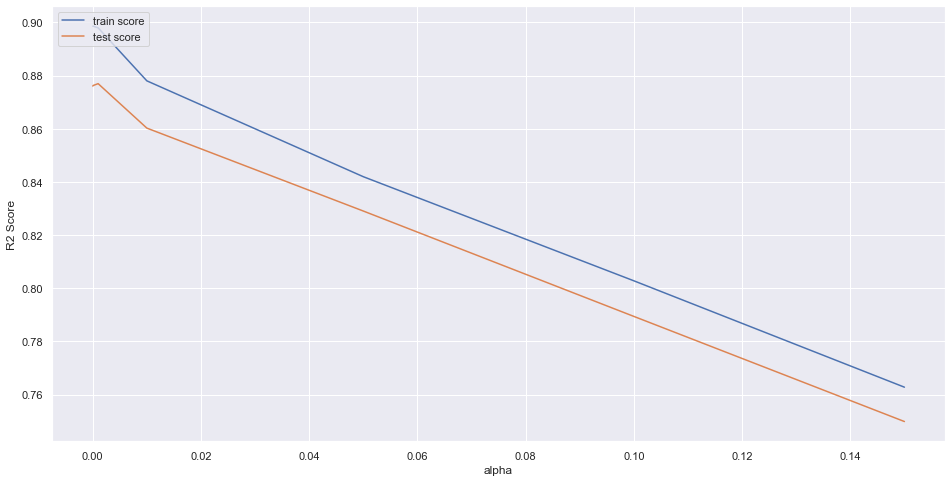

In [115]:
# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [116]:
# Checking the best parameters
model_cv.best_params_

{'alpha': 0.001}

In [117]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 9.98654450e-02, -7.54720429e-03,  7.10281126e-02, -1.86216503e-02,
       -0.00000000e+00, -3.06345522e-02, -3.16444566e-02,  1.76309292e-01,
       -6.28283895e-03, -3.39528025e-02, -7.30374410e-02,  4.64911767e-02,
        5.06766418e-02,  1.00755026e-01, -0.00000000e+00,  2.16609453e-02,
        1.67728770e-02, -1.88010507e-01,  1.74139959e-04, -4.80506971e-03,
        3.90860413e-02,  2.48989209e-01,  2.60618627e-01,  9.15900925e-02,
       -1.38000397e-01, -0.00000000e+00, -3.89703506e-02, -1.36751237e-02,
        8.71331991e-02,  3.39979546e-01, -3.25713108e-01, -1.69308318e-02,
        1.65984925e-01,  7.34384719e-02, -2.61561839e-01, -2.10826182e-01,
       -7.51933769e-02, -8.44539232e-02, -2.74031503e-02,  1.15710720e-01,
       -3.14382292e-02, -1.10307311e-01,  9.81366864e-02,  0.00000000e+00,
       -1.62268775e-01, -1.60467266e-01,  1.79322308e-01,  3.93967050e-02,
       -1.10338270e-02, -3.83604989e-02])

In [118]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# predict
y_train_pred = lasso.predict(X_train)
print("Train R2 Score : ",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test[cols])
print("Test R2 Score : ",r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

Train R2 Score :  0.8971793062823481
Test R2 Score :  0.883607463978435


## Final Model Selection + Evaluation

- Both models are having comparable performance in terms of R2 Score on Test and Train
- We will go ahead with **Lasso** as it is the least complex model when checked from the final coefficient perspective

Lasso [alpha : 0.001]

R2 Score

In [119]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# predict
y_train_pred = lasso.predict(X_train)
print("Train R2 Score : ",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test[cols])
print("Test R2 Score : ",r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

Train R2 Score :  0.8971793062823481
Test R2 Score :  0.883607463978435


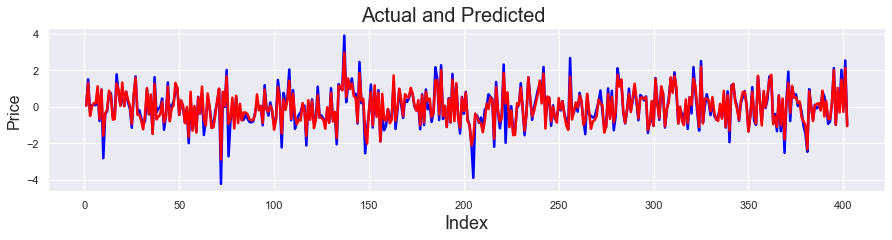

In [120]:
# Actual vs Predicted
c = [i for i in range(1,X_test.shape[0]+1,1)]
fig = plt.figure(figsize = (15, 3))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                       # Y-label
plt.show()

In [121]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Feaure','Coef']

#### Final Model Coefficient

In [122]:
lasso_coef.reindex(lasso_coef.Coef.abs().sort_values(ascending=False).index)

,Feaure,Coef
30,Neighborhood_Crawfor,0.340
31,Neighborhood_Edwards,-0.326
35,OverallQual_7,-0.262
23,OverallQual_simple,0.261
22,Total_SF,0.249
36,OverallCond_4,-0.211
18,Age,-0.188
47,Functional_Typ,0.179
8,GrLivArea,0.176
33,Condition1_Norm,0.166


In [123]:
lasso_coef.reindex(lasso_coef.Coef.abs().sort_values(ascending=False).index).shape

(51, 2)

## Conclusion

- **Final Model -**
    - Lasso [alpha : 0.001]
    - Number of Features : 45
    - Train R2 Score : 0.897
    - Test R2 Score : 0.883
<br>
<br>
- Our model has been able to explain **89.7% variance in train** and **88.3% variance in test**
- Just **1%** of gap between Train and Test R2 Score proves the final model is robust 

- **Top 5 Features :** (based on coef)
    - **Neighborhood_Crawfor**  : (Crawford)
    - **Neighborhood_Edwards**  : (Edwards)
    - **OverallQual_7**  : (Good)
    - **OverallQual_simple**  : (OverallQual Feature squashed into smaller groups)
    - **Total_SF**  : (TotalBsmtSF + GrLivArea)

- Best Parameter for **Ridge** Model : 'alpha': 5.0
- Best Parameter for **Lasso** Model : 'alpha': 0.001

## Q1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Double Aplha Values

- Ridge : 10 
- Lasso : 0.002

In [124]:
final_feats = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Total_Bath', 'Total_SF',
       'Age', 'TimeSinceSold', 'TimeSinceGarageBlt', 'OverallQual_simple',
       'OverallCond_simple', 'MSSubClass_30', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_Reg', 'LandContour_Lvl', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_OldTown', 'Condition1_Norm',
       'OverallQual_6', 'OverallQual_7', 'OverallCond_4', 'OverallCond_5',
       'ExterQual_TA', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'HeatingQC_TA', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Typ', 'GarageType_Detchd',
       'GarageFinish_Unf', 'SaleType_WD']

In [125]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print("Train R2 Score : ",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test[final_feats])
print("Test R2 Score : ",r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

Train R2 Score :  0.8964471100773924
Test R2 Score :  0.39998925398014107


In [126]:
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# predict
y_train_pred = lasso.predict(X_train)
print("Train R2 Score : ",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test[final_feats])
print("Test R2 Score : ",r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

Train R2 Score :  0.8957967294474015
Test R2 Score :  0.26293694515143406


In [127]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Feaure','Coef']

Checking changes to the Top 5 predictor features

In [130]:
lasso_coef.reindex(lasso_coef.Coef.abs().sort_values(ascending=False).index).head(10)

,Feaure,Coef
30,Neighborhood_Crawfor,0.315
31,Neighborhood_Edwards,-0.303
23,OverallQual_simple,0.260
35,OverallQual_7,-0.257
22,Total_SF,0.250
18,Age,-0.194
36,OverallCond_4,-0.180
47,Functional_Typ,0.165
33,Condition1_Norm,0.157
8,GrLivArea,0.145


## Q3

After building the model, you realized that the five most important predictor variables in the 
lasso model are not available in the incoming data. You will now have to create another model 
excluding the five most important predictor variables. Which are the five most important 
predictor variables now?

In [132]:
final_feats = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Total_Bath',
       'Age', 'TimeSinceSold', 'TimeSinceGarageBlt',
       'OverallCond_simple', 'MSSubClass_30', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_Reg', 'LandContour_Lvl', 'Neighborhood_OldTown', 'Condition1_Norm',
       'OverallQual_6', 'OverallCond_4', 'OverallCond_5',
       'ExterQual_TA', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'HeatingQC_TA', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Typ', 'GarageType_Detchd',
       'GarageFinish_Unf', 'SaleType_WD']

In [133]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train[final_feats], y_train)

# predict
y_train_pred = lasso.predict(X_train[final_feats])
print("Train R2 Score : ",r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test[final_feats])
print("Test R2 Score : ",r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

Train R2 Score :  0.8741561319482688
Test R2 Score :  0.862285431341556


In [135]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train[final_feats].columns
cols = cols.insert(0, "constant")
lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Feaure','Coef']

In [136]:
lasso_coef.reindex(lasso_coef.Coef.abs().sort_values(ascending=False).index).head(6)

,Feaure,Coef
8,GrLivArea,0.477
31,OverallCond_4,-0.282
41,KitchenQual_TA,-0.275
42,Functional_Typ,0.258
40,KitchenQual_Gd,-0.225
29,Condition1_Norm,0.196
